# Fraud Detection with SMOTE, AutoEncoders and Isolation Forest

Obejective: To build a predictive model for detecting credit card fraud using supervised and unsupervised Machine Learning and Deep Learning algorithms. 

Data: Public dataset from Kaggle Challenge (https://www.kaggle.com/mlg-ulb/creditcardfraud). It has 284K samples and 30 independent variables.

Algorithms: 
Supervised ML - Random Forest, XGBoost, LightGBM with SMOTE (Synthetic Minority Oversampling TEchniques) for handling class imbalance
Deep Learning-based Methods - AutoEncoders
Unsupervised ML - Local Outlier Factor, Isolation Forest


Results: Unsupervised methods, especially Isolation Forest provides a more robust and stable method for ever-evolving transactions and application credit card fraud

# Step 1: Exploratory Data Analysis

In [87]:
# Import relevant Python libraries

In [88]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline 
import gc
from datetime import datetime

In [89]:
# Import fraud detection dataset from Kaggle (https://www.kaggle.com/mlg-ulb/creditcardfraud/downloads/creditcardfraud.zip/3)
data_df = pd.read_csv('./creditcard.csv')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [90]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [91]:
# Fraud vs. Valid Transactions

In [92]:
temp = data_df["Class"].value_counts()
df = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = df['Class'],y = df['values'],
    name="Credit Card Fraud Data (Valid = 0, Fraud = 1)",
    marker=dict(color="Blue"),
    text=df['values']
)
data = [trace]
layout = dict(title = 'Credit Card Fraud Data (Valid = 0, Fraud = 1)',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=400
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

In [93]:
# Transactions over time

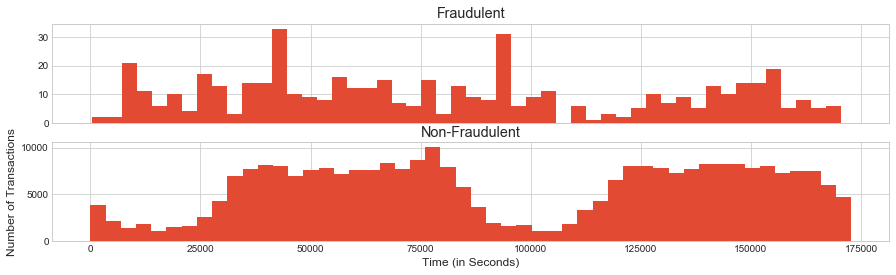

In [94]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, figsize = [15,4])

ax1.hist(data_df.Time[data_df.Class == 1], bins = 50)
ax1.set_title("Fraudulent")
ax2.hist(data_df.Time[data_df.Class == 0], bins = 50)
ax2.set_title("Non-Fraudulent")

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [95]:
# Transactions by Amount

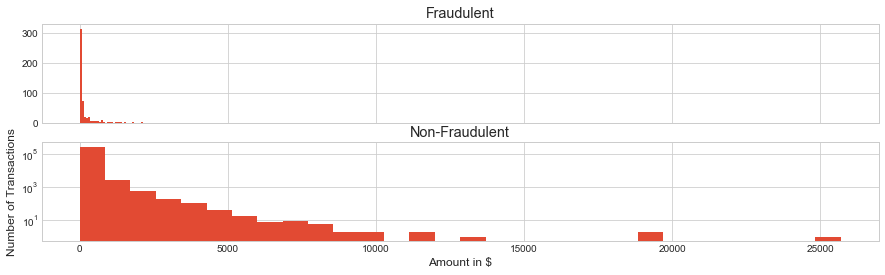

In [96]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, figsize = [15,4])

ax1.hist(data_df.Amount[data_df.Class == 1], bins = 30)
ax1.set_title("Fraudulent")
ax2.hist(data_df.Amount[data_df.Class == 0], bins = 30)
ax2.set_title("Non-Fraudulent")

plt.xlabel('Amount in $')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [97]:
# Feature Analysis

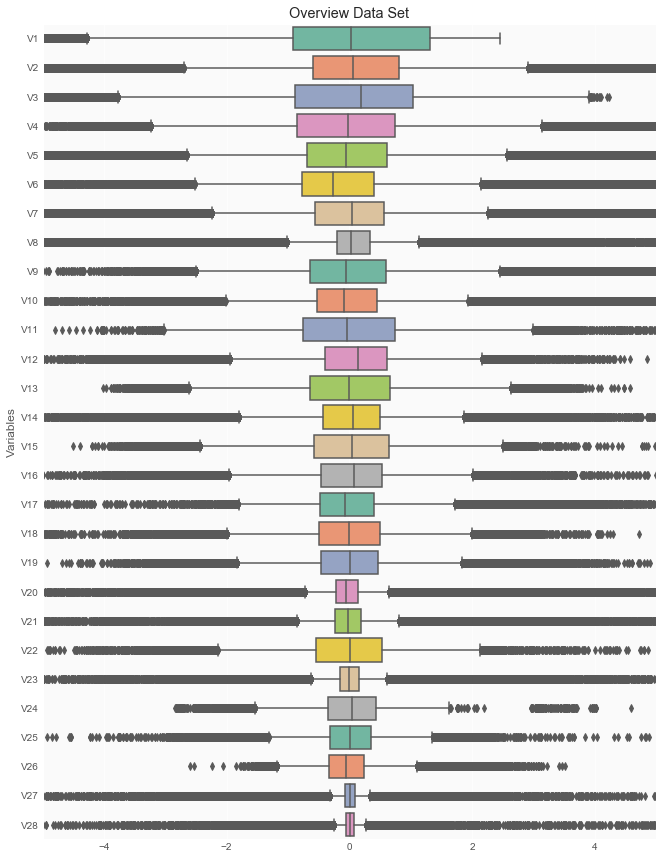

In [98]:
plt.style.use('ggplot') 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-5, 5))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = data_df.drop(columns=['Amount', 'Class', 'Time']), 
  orient = 'h', 
  palette = 'Set2')

In [99]:
# Transactions Amount Analysis

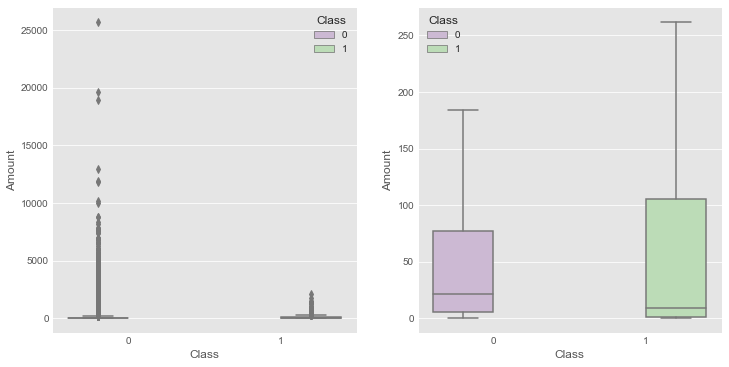

In [100]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=False)
plt.show();

In [101]:
# Feature Analysis

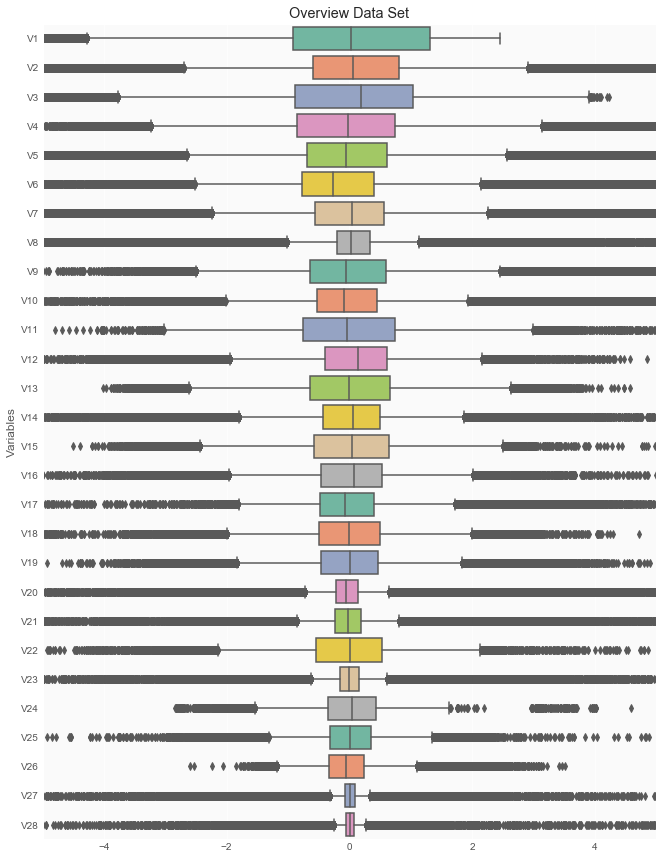

In [102]:
plt.style.use('ggplot') 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-5, 5))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = data_df.drop(columns=['Amount', 'Class', 'Time']), 
  orient = 'h', 
  palette = 'Set2')

In [103]:
# Feature Density Plots

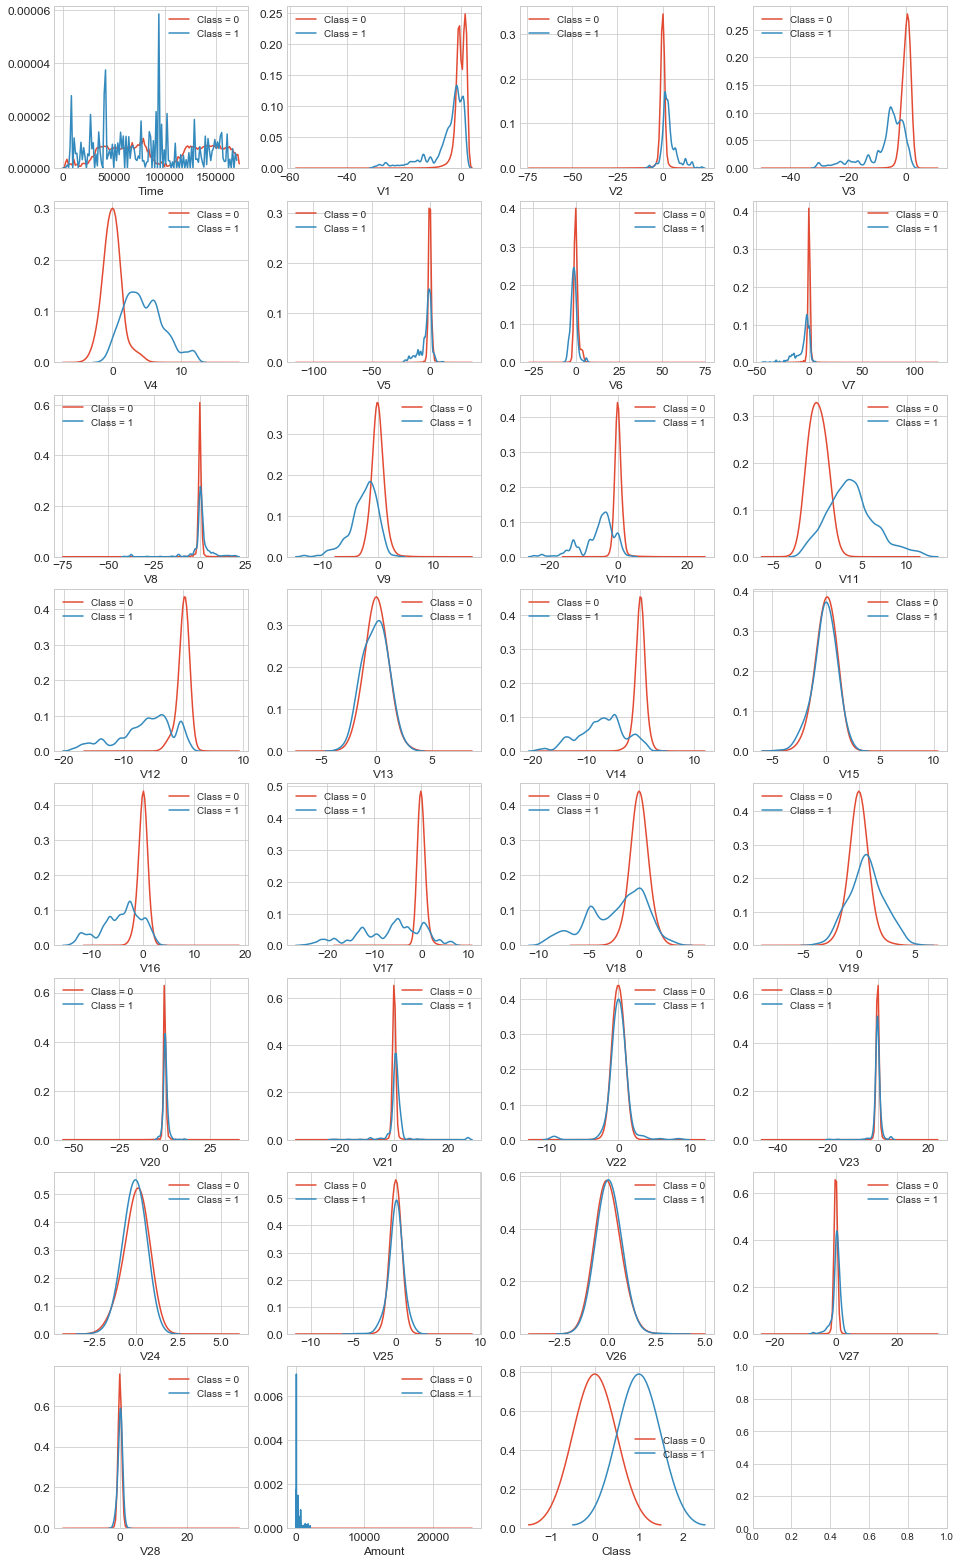

In [104]:
var = data_df.columns.values

i = 0
t0 = data_df.loc[data_df['Class'] == 0]
t1 = data_df.loc[data_df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [105]:
# Correlation Analysis

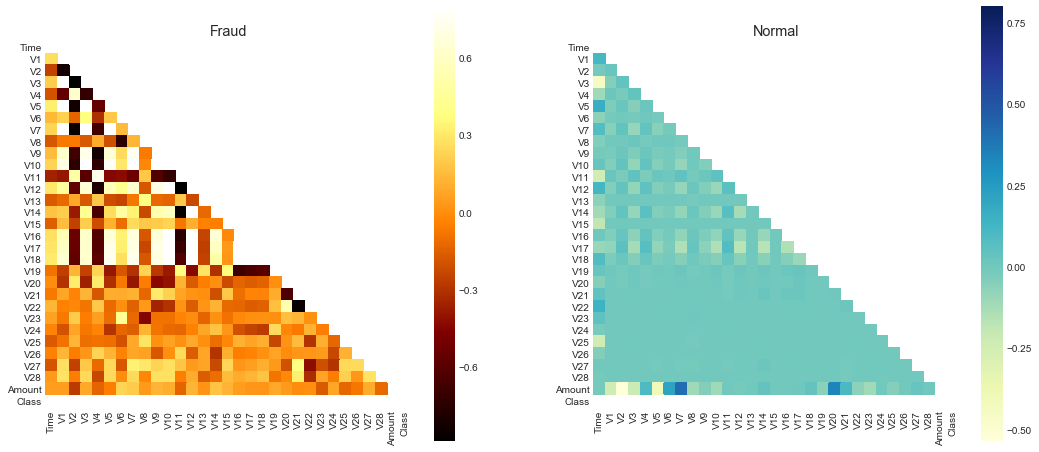

In [106]:
# Correlation matrix 
f, (ax1, ax2) = plt.subplots(1,2,figsize =( 18, 8))
corr = data_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap((data_df.loc[data_df['Class'] ==1]).corr(), vmax = .8, square=True, ax = ax1, cmap = 'afmhot', mask=mask);
ax1.set_title('Fraud')
sns.heatmap((data_df.loc[data_df['Class'] ==0]).corr(), vmax = .8, square=True, ax = ax2, cmap = 'YlGnBu', mask=mask);
ax2.set_title('Normal')
plt.show()

In [107]:
# Visualizing the Data with t-SNE
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score

In [108]:
#reload the original dataset
tsne_data = data_df

#Set df2 equal to all of the fraulent and 10,000 normal transactions.
df2 = tsne_data[tsne_data.Class == 1]
df2 = pd.concat([df2, tsne_data[tsne_data.Class == 0].sample(n = 10000)], axis = 0)

#Scale features to improve the training ability of TSNE.
standard_scaler = StandardScaler()
df2_std = standard_scaler.fit_transform(df2)

#Set y equal to the target values.
y = df2.ix[:,-1].values

tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(df2_std)

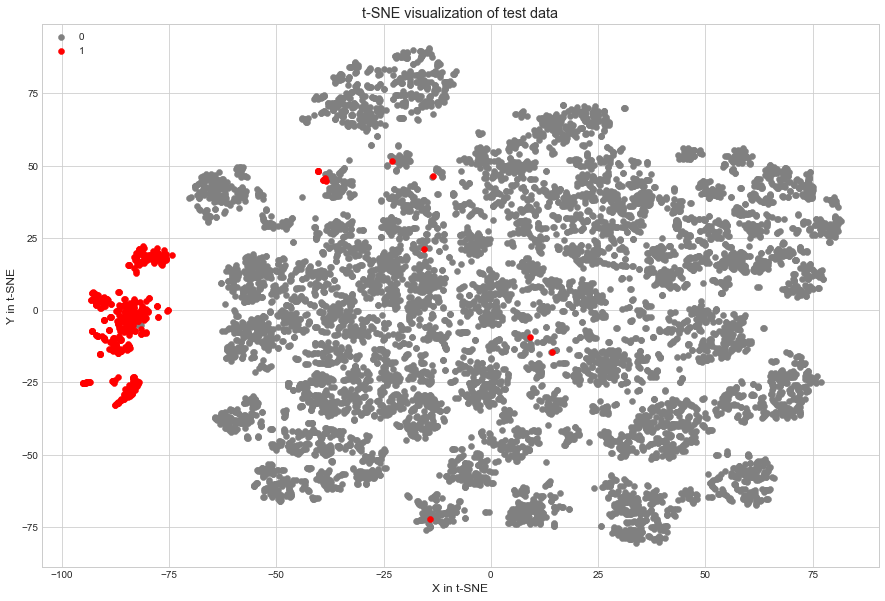

In [109]:
#Build the scatter plot with the two types of transactions.
color_map = {0:'grey', 1:'red'}
plt.figure(figsize = (15,10))
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = x_test_2d[y==cl,0], 
                y = x_test_2d[y==cl,1], 
                c = color_map[idx], 
                label = cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()

# Step 2: Prepare Test and Train dataframes

In [110]:
#Define predictors and target values¶

In [111]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [112]:
#Split data in train, test and validation set

In [113]:
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split
RANDOM_STATE = 2018

train_df, test_df = train_test_split(data_df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

# Step 3: Supervised Machine Learning with SMOTE

In [114]:
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
import warnings
warnings.filterwarnings('ignore')

In [115]:
#Normalize amount variable
data_df["Normalized_Amount"] = StandardScaler().fit_transform(data_df['Amount'].values.reshape(-1, 1))
df = data_df.drop(['Time', 'Amount'], axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [116]:
Class = [len(df.loc[df.Class == 1]), len(df.loc[df.Class == 0])]
pd.Series(Class, index = ['Fraudulent', 'Non-fraudulent'], name = 'target')

Fraudulent           492
Non-fraudulent    284315
Name: target, dtype: int64

In [117]:
#Percentage of minority(fraudulent) class
print('% of Fraudulent Class = {:.3f}%'.format(len(df[df.Class == 1])*100 / len(df)))

% of Fraudulent Class = 0.173%


In [118]:
# Define functions for using ML algorithms with balacing techniques

def results(balancing_technique):
    print(balancing_technique)
    fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6))
    model_name = ["RF", "XGB", "LGB"]
    RFC = RandomForestClassifier(random_state = 0)
    XGBC = XGBClassifier(random_state = 0)
    LGBC = LGBMClassifier(random_state = 0)

    for clf,i in zip([RFC, XGBC, LGBC], model_name):
        model = clf.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:,1]
        print("#"*25,i,"#"*25)
        print("Training Accuracy = {:.3f}".format(model.score(X_train, y_train)))
        print("Test Accuracy = {:.3f}".format(model.score(X_test, y_test)))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
        #Confusion Matrix
        print(confusion_matrix(y_test, y_pred))
        print("-"*15,"CLASSIFICATION REPORT","-"*15)
        print(classification_report(y_test, y_pred))
        
        #precision-recall curve
        precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
        avg_pre = average_precision_score(y_test, y_pred_prob)
        ax1.plot(precision, recall, label = i+ " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.7)
        ax1.set_xlabel('Precision', fontsize = 14)
        ax1.set_ylabel('Recall', fontsize = 14)
        ax1.set_title('Precision-Recall Curve', fontsize = 18)
        ax1.legend(loc = 'best')
        #find default threshold
        close_default = np.argmin(np.abs(thresholds_pr - 0.5))
        ax1.plot(precision[close_default], recall[close_default], 'o', markersize = 8)

        #roc-curve
        fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr,tpr)
        ax2.plot(fpr,tpr, label = i+ " area = {:0.2f}".format(roc_auc), lw = 3, alpha = 0.7)
        ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
        ax2.set_xlabel("False Positive Rate", fontsize = 14)
        ax2.set_ylabel("True Positive Rate", fontsize = 14)
        ax2.set_title("ROC Curve", fontsize = 18)
        ax2.legend(loc = 'best')
       
        #find default threshold
        close_default = np.argmin(np.abs(thresholds_roc - 0.5))
        ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
        plt.tight_layout()

In [119]:
X = df.drop(columns = 'Class')
y = df['Class']
#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,)

Without Balancing
######################### RF #########################
Training Accuracy = 1.000
Test Accuracy = 1.000
ROC_AUC_score : 0.892104
[[85281     9]
 [   33   120]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.93      0.78      0.85       153

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.96      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443

######################### XGB #########################
Training Accuracy = 1.000
Test Accuracy = 1.000
ROC_AUC_score : 0.898640
[[85281     9]
 [   31   122]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.93      0.80      0.86       153

   micro avg       1.00      1.00      1.00     85443
   macro a

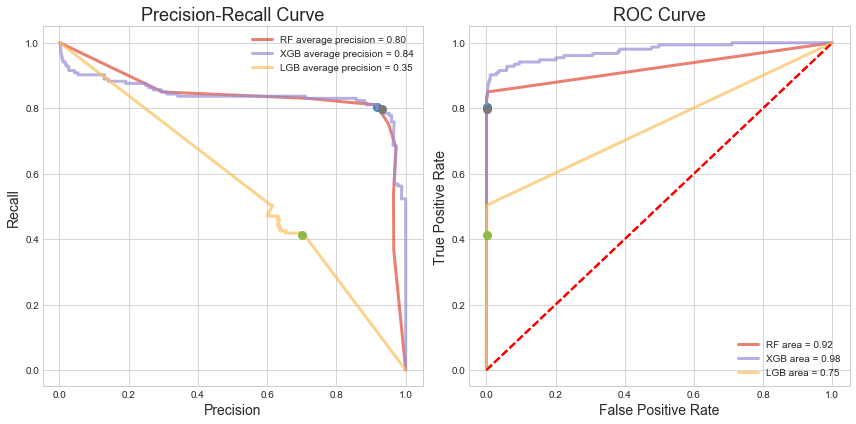

In [120]:
results("Without Balancing")

# Step 3.1: Downsampling Majority Class

In [121]:
print("Minority Class =", len(df[df.Class == 1]))

Minority Class = 492


In [122]:
train_majority = df[df.Class == 0]
train_minority = df[df.Class == 1]
train_majority_downsampled = resample(train_majority, replace = False, n_samples = 492, random_state = 0)
train_downsampled = pd.concat([train_majority_downsampled, train_minority])

In [123]:
X = train_downsampled.drop(columns = 'Class')
y = train_downsampled['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Down Sampling
######################### RF #########################
Training Accuracy = 0.993
Test Accuracy = 0.922
ROC_AUC_score : 0.922545
[[141   6]
 [ 17 132]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       147
           1       0.96      0.89      0.92       149

   micro avg       0.92      0.92      0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296

######################### XGB #########################
Training Accuracy = 0.999
Test Accuracy = 0.939
ROC_AUC_score : 0.939369
[[142   5]
 [ 13 136]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       147
           1       0.96      0.91      0.94       149

   micro avg       0.94      0.94      0.94       296
   macro avg       0.94      0

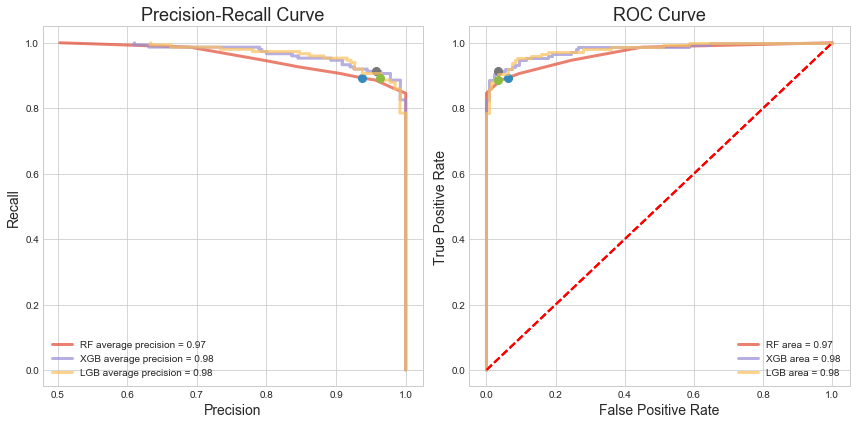

In [124]:
results("Down Sampling")

Result: All models performed satisfactorily but the main problem with down sampling is that we will lose a lot of useful information from the dataset as it is removing more than 99% of non-fraudulent cases from the dataset. This is not a practial approach.

# Step 3.2: Upsampling Minority Class

In [125]:
#Note in up sampling, first split the minority class data into train and test set and then up-sample the train data and test it with test data
X = df.drop(columns = 'Class')
y = df['Class']
#First split data into train and test
X_train_us, X_test, y_train_us, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
#Now resample the train data
df_us = pd.concat([X_train_us, y_train_us], axis = 1)
train_majority = df_us[df_us.Class == 0]
train_minority = df_us[df_us.Class == 1]
train_majority.shape, train_minority.shape

((199019, 30), (345, 30))

In [126]:
train_minority_upsampled = resample(train_minority, replace = True, n_samples = 199019, random_state = 0)
print(train_majority.shape, train_minority_upsampled.shape)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
X_train = train_upsampled.drop(columns = 'Class')
y_train = train_upsampled['Class']

(199019, 30) (199019, 30)


Up Sampling
######################### RF #########################
Training Accuracy = 1.000
Test Accuracy = 1.000
ROC_AUC_score : 0.877528
[[85292     4]
 [   36   111]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.97      0.76      0.85       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

######################### XGB #########################
Training Accuracy = 0.998
Test Accuracy = 0.996
ROC_AUC_score : 0.933346
[[84950   346]
 [   19   128]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.27      0.87      0.41       147

   micro avg       1.00      1.00      1.00     85443
   macro avg    

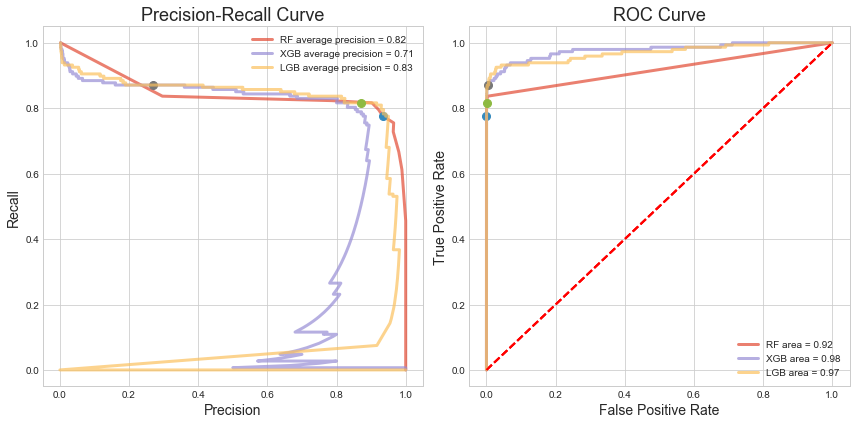

In [127]:
results("Up Sampling")

Using up sampling, XGBoost performs well on recall but precision is decreased. 

# Step 3.3: SMOTE Regular (Synthetic Minority Over-sampling Technique)

Over-sampling consists of either sampling each member of the minority class with replacement, or creating synthetic members by randomly sampling from the feature set

In [128]:
sm = SMOTE(random_state = 0)
X = df.drop(columns = 'Class')
y = df['Class']
X_train_sm, X_test, y_train_sm, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train, y_train = sm.fit_sample(X_train_sm, y_train_sm)
X_test = np.array(X_test)
y_test = np.array(y_test)

SMOTE Regular
######################### RF #########################
Training Accuracy = 1.000
Test Accuracy = 0.999
ROC_AUC_score : 0.891092
[[85285    11]
 [   32   115]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.91      0.78      0.84       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.96      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

######################### XGB #########################
Training Accuracy = 0.986
Test Accuracy = 0.991
ROC_AUC_score : 0.934127
[[84503   793]
 [   18   129]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.14      0.88      0.24       147

   micro avg       0.99      0.99      0.99     85443
   macro avg  

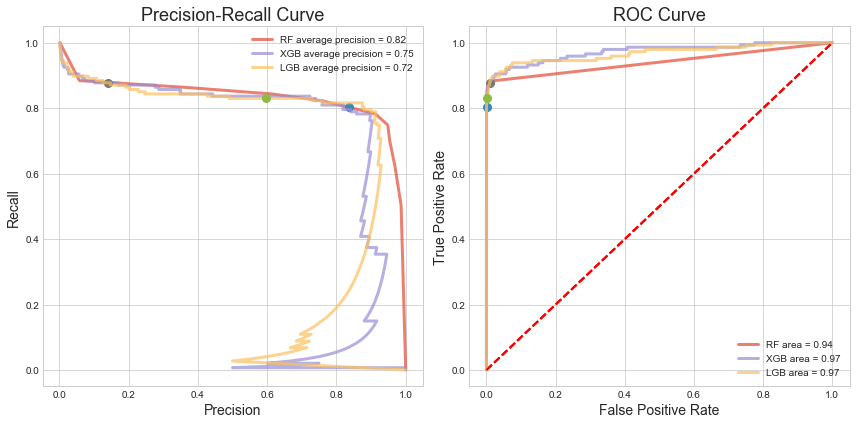

In [129]:
results("SMOTE Regular")

Applying SMOTE, RF performed very well. Looking at ROC-AUC curve, boosting performed well.

# Step 3.4: SMOTE Borderline

In [130]:
sm = BorderlineSMOTE(random_state = 0)
X = df.drop(columns = 'Class')
y = df['Class']
X_train_sm, X_test, y_train_sm, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train, y_train = sm.fit_sample(X_train_sm, y_train_sm)
X_test = np.array(X_test)
y_test = np.array(y_test)

Borderline SMOTE
######################### RF #########################
Training Accuracy = 1.000
Test Accuracy = 0.999
ROC_AUC_score : 0.884301
[[85287     9]
 [   34   113]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.93      0.77      0.84       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.96      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

######################### XGB #########################
Training Accuracy = 0.999
Test Accuracy = 0.998
ROC_AUC_score : 0.920843
[[85138   158]
 [   23   124]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.44      0.84      0.58       147

   micro avg       1.00      1.00      1.00     85443
   macro av

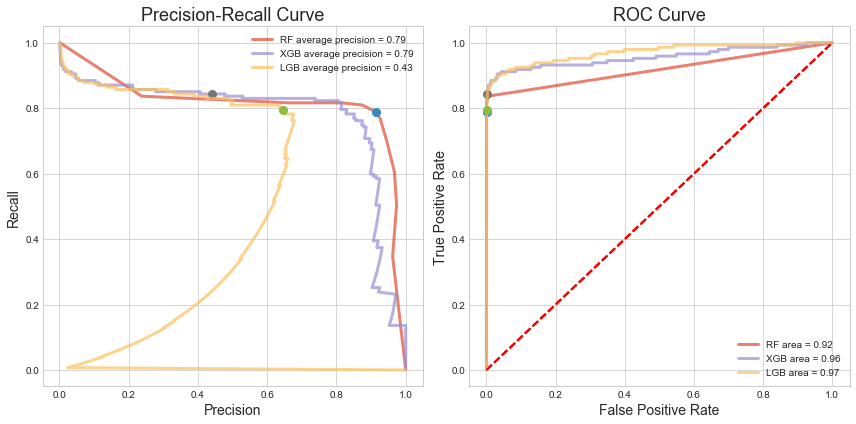

In [131]:
results("Borderline SMOTE")

Applying Borderline SMOTE, again RF gave high F1-score. Surprisingly, LGB performed worst looking at PR curves and best according to ROC.

# Step 3.5: ADASYN (ADASYN = SMOTE + random values between 0 and 1)

In [132]:
adasyn = ADASYN(random_state = 0)
X = df.drop(columns = 'Class')
y = df['Class']
X_train_as, X_test, y_train_as, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train, y_train = adasyn.fit_sample(X_train_as, y_train_as)
X_test = np.array(X_test)
y_test = np.array(y_test)

ADASYN
######################### RF #########################
Training Accuracy = 1.000
Test Accuracy = 0.999
ROC_AUC_score : 0.887650
[[85278    18]
 [   33   114]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.86      0.78      0.82       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.93      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443

######################### XGB #########################
Training Accuracy = 0.980
Test Accuracy = 0.971
ROC_AUC_score : 0.931334
[[82866  2430]
 [   16   131]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85296
           1       0.05      0.89      0.10       147

   micro avg       0.97      0.97      0.97     85443
   macro avg       0.

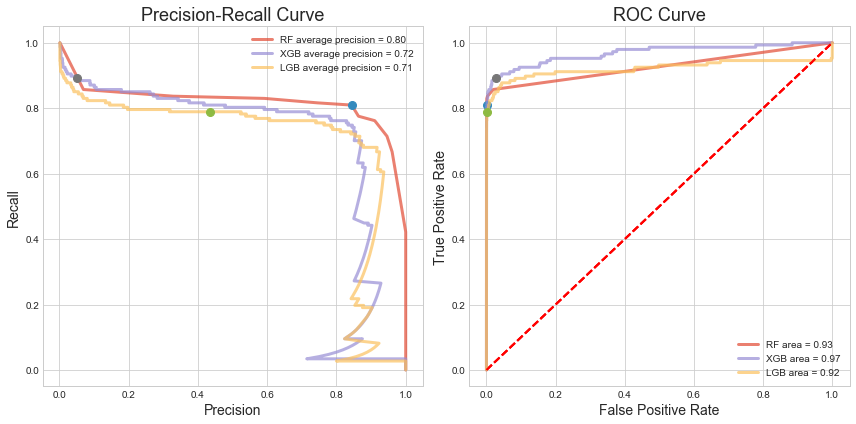

In [133]:
results("ADASYN")

RESULTS & CONCLUSIONS:
ROC curve for all three models were almost same. PR curve however differentiated somewhat performance based on precision. Random forest performed best when data was balanced with different techniques as it maintained recall and precision with the default threshold and maintained precision as compared to boosting as the threshold was decreasing. For imbalanced data XGB performed slightly well as compared to RF. For balanced data, boosting made predictions with high recall and compromising precision and RF made predictions based on both recall and precision. From PR curves, one can say that models performed well and almost same with SMOTE Regular. User can set threshold to obtain the required result as per the business goal.

# Step 4: Deep Learning with AutoEncoders

In [134]:
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [135]:
from sklearn.preprocessing import StandardScaler
data = data_df.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [136]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

This Autoencoder uses 4 fully connected layers with 14, 7, 7 and 29 neurons respectively. The first two layers are used for our encoder, the last two go for the decoder. Additionally, L1 regularization will be used during training:

In [137]:
input_dim = X_train.shape[1]
encoding_dim = 14

In [138]:

input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [139]:
nb_epoch = 100
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Train on 227451 samples, validate on 56962 samples
Epoch 1/100
227451/227451 [==============================] - 11s 47us/step - loss: 0.8000 - acc: 0.5671 - val_loss: 0.7652 - val_acc: 0.6409
Epoch 2/100
227451/227451 [==============================] - 11s 46us/step - loss: 0.7301 - acc: 0.6459 - val_loss: 0.7492 - val_acc: 0.6519
Epoch 3/100
227451/227451 [==============================] - 11s 46us/step - loss: 0.7200 - acc: 0.6538 - val_loss: 0.7424 - val_acc: 0.6675
Epoch 4/100
227451/227451 [==============================] - 10s 46us/step - loss: 0.7147 - acc: 0.6649 - val_loss: 0.7377 - val_acc: 0.6681
Epoch 5/100
227451/227451 [==============================] - 10s 44us/step - loss: 0.7106 - acc: 0.6725 - val_loss: 0.7409 - val_acc: 0.6740
Epoch 6/100
227451/227451 [==============================] - 8s 35us/step - loss: 0.7088 - acc: 0.6752 - val_loss: 0.7329 - val_acc: 0.6830
Epoch 7/100
227451/227451 [==============================] - 11s 50us/step - loss: 0.7071 - acc: 0.6801 

227451/227451 [==============================] - 12s 54us/step - loss: 0.6966 - acc: 0.7031 - val_loss: 0.7257 - val_acc: 0.7066
Epoch 59/100
227451/227451 [==============================] - 13s 56us/step - loss: 0.6978 - acc: 0.7023 - val_loss: 0.7253 - val_acc: 0.7073
Epoch 60/100
227451/227451 [==============================] - 14s 61us/step - loss: 0.6976 - acc: 0.7010 - val_loss: 0.7260 - val_acc: 0.7105
Epoch 61/100
227451/227451 [==============================] - 11s 48us/step - loss: 0.6974 - acc: 0.7021 - val_loss: 0.7254 - val_acc: 0.7104
Epoch 62/100
227451/227451 [==============================] - 10s 46us/step - loss: 0.6972 - acc: 0.7019 - val_loss: 0.7273 - val_acc: 0.7094
Epoch 63/100
227451/227451 [==============================] - 11s 49us/step - loss: 0.6966 - acc: 0.7023 - val_loss: 0.7321 - val_acc: 0.7023
Epoch 64/100
227451/227451 [==============================] - 11s 49us/step - loss: 0.6969 - acc: 0.7029 - val_loss: 0.7279 - val_acc: 0.7079
Epoch 65/100
227451

In [140]:
autoencoder = load_model('model.h5')

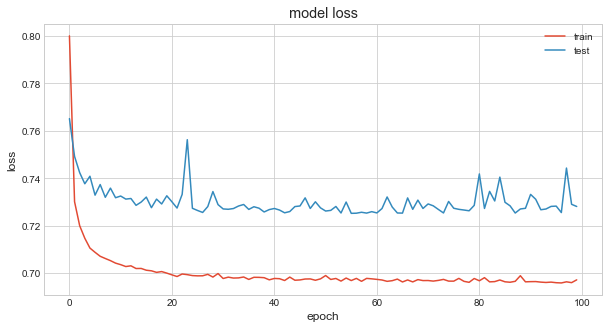

In [141]:
plt.figure(figsize=(10,5))
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [142]:
predictions = autoencoder.predict(X_test)

In [143]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [144]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

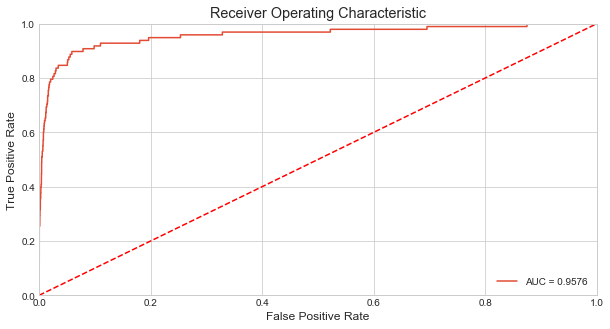

In [145]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

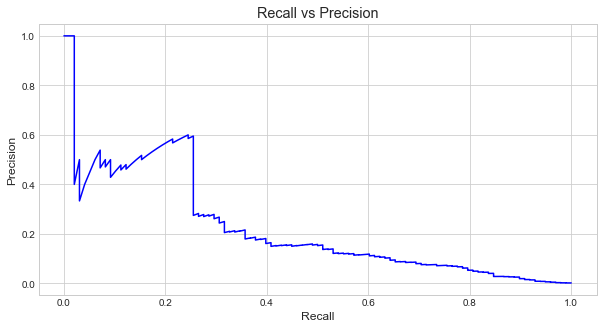

In [146]:
plt.figure(figsize=(10,5))
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

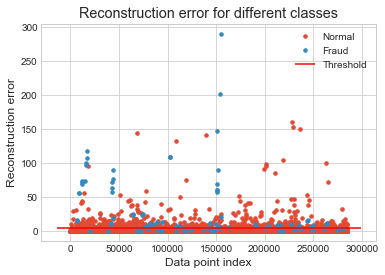

In [147]:
threshold = 5
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

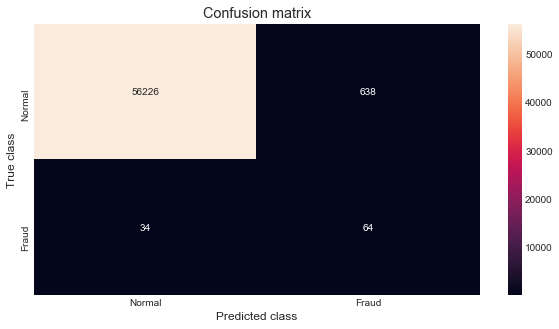

In [148]:
LABELS = ["Normal", "Fraud"]
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Step 5: Unspervised Anomoly Detection Algorithms

In [149]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [150]:
inliers = data_df[data_df.Class==0]
inliers = inliers.drop(['Class'], axis=1)
outliers = data_df[data_df.Class==1]
outliers = outliers.drop(['Class'], axis=1)
outlier_fraction = len(outliers)/float(len(inliers))

inliers_train, inliers_test = train_test_split(inliers, test_size=0.30, random_state=1)

In [151]:
# Step 5.1: Local Outlier Factor Algorithm

It anomalous data points by measuring the local deviation of a given data point with respect to its neighbours. https://towardsdatascience.com/local-outlier-factor-for-anomaly-detection-cc0c770d2ebe

In [152]:
from sklearn.neighbors import LocalOutlierFactor

model = LocalOutlierFactor(novelty=True)
model.fit(inliers_train)
inlier_pred_test = model.predict(inliers_test)
outlier_pred = model.predict(outliers)

In [153]:
print("Accuracy in Detecting Legit Cases:", list(inlier_pred_test).count(1)/inlier_pred_test.shape[0])
print("Accuracy in Detecting Fraud Cases:", list(outlier_pred).count(-1)/outlier_pred.shape[0])

Accuracy in Detecting Legit Cases: 0.8931473122691834
Accuracy in Detecting Fraud Cases: 0.44308943089430897


In [154]:
lof_predictions= model.predict((data_df.drop(['Class'], axis=1)))
lof_score = model.score_samples((data_df.drop(['Class'], axis=1)))

In [155]:
lof_predictions = pd.DataFrame({
    "predicted_class": list(map(lambda x: 1*(x == -1), lof_predictions)),
    "class": data_df["Class"],
    "predict": -lof_score
})

lof_predictions.head()

,class,predict,predicted_class
0,0,1.731482,1
1,0,1.418394,1
2,0,2.290178,1
3,0,1.850642,1
4,0,2.191429,1


In [156]:
%matplotlib inline 
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np


def get_auc(labels, scores):
    fpr, tpr, thresholds = roc_curve(labels, scores)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score


def get_aucpr(labels, scores):
    precision, recall, th = precision_recall_curve(labels, scores)
    aucpr_score = np.trapz(recall, precision)
    return precision, recall, aucpr_score


def plot_metric(ax, x, y, x_label, y_label, plot_label, style="-"):
    ax.plot(x, y, style, label=plot_label)
    ax.legend()
    
    ax.set_ylabel(x_label)
    ax.set_xlabel(y_label)


def prediction_summary(labels, predicted_score, info, plot_baseline=True, axes=None):
    if axes is None:
        axes = [plt.subplot(1, 2, 1), plt.subplot(1, 2, 2)]

    fpr, tpr, auc_score = get_auc(labels, predicted_score)
    plot_metric(axes[0], fpr, tpr, "False positive rate",
                "True positive rate", "{} AUC = {:.4f}".format(info, auc_score))
    if plot_baseline:
        plot_metric(axes[0], [0, 1], [0, 1], "False positive rate",
                "True positive rate", "baseline AUC = 0.5", "black")

    precision, recall, aucpr_score = get_aucpr(labels, predicted_score)
    plot_metric(axes[1], recall, precision, "Recall",
                "Precision", "{} AUCPR = {:.4f}".format(info, aucpr_score))
    if plot_baseline:
        thr = sum(labels)/len(labels)
        plot_metric(axes[1], [0, 1], [thr, thr], "Recall",
                "Precision", "baseline AUCPR = {:.4f}".format(thr), "black")

    plt.show()
    return axes


def figure():
    fig_size = 8
    f = plt.figure()
    f.set_figheight(fig_size)
    f.set_figwidth(fig_size*2)

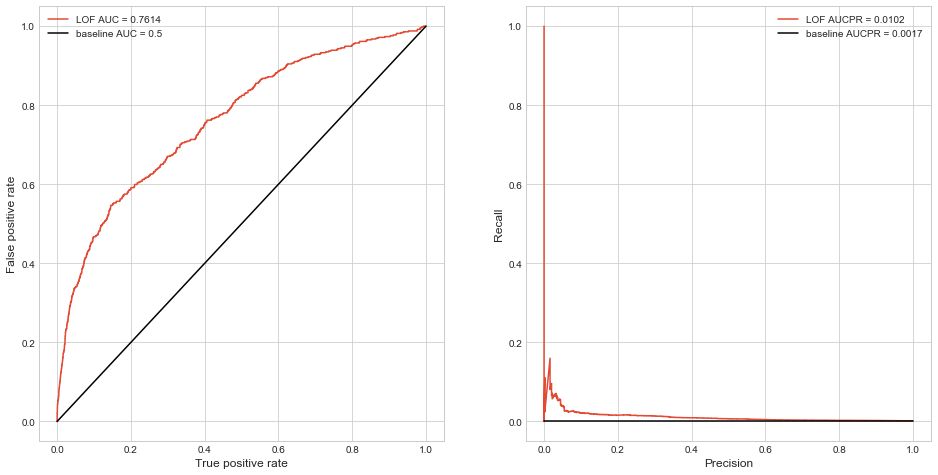

In [157]:
figure()
axes = prediction_summary(
    lof_predictions["class"], lof_predictions["predict"], "LOF")

# Step 5.2: Isolation Forest

The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation. This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set. https://blog.easysol.net/using-isolation-forests-anamoly-detection/

In [158]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [159]:
model = IsolationForest()
model.fit(data_df.drop(['Class'], axis=1))
inlier_pred_test = model.predict(inliers_test)
outlier_pred = model.predict(outliers)

In [160]:
print("Accuracy in Detecting Legit Cases:", list(inlier_pred_test).count(1)/inlier_pred_test.shape[0])
print("Accuracy in Detecting Fraud Cases:", list(outlier_pred).count(-1)/outlier_pred.shape[0])

Accuracy in Detecting Legit Cases: 0.9014596400726889
Accuracy in Detecting Fraud Cases: 0.8963414634146342


In [161]:
iso_predictions= model.predict((data_df.drop(['Class'], axis=1)))
iso_score = model.score_samples((data_df.drop(['Class'], axis=1)))

In [162]:
iso_predictions = pd.DataFrame({
    "predicted_class": list(map(lambda x: 1*(x == -1), iso_predictions)),
    "class": data_df["Class"],
    "predict": -iso_score
})

iso_predictions.head()

,class,predict,predicted_class
0,0,0.390065,0
1,0,0.373067,0
2,0,0.468249,1
3,0,0.413563,0
4,0,0.400177,0


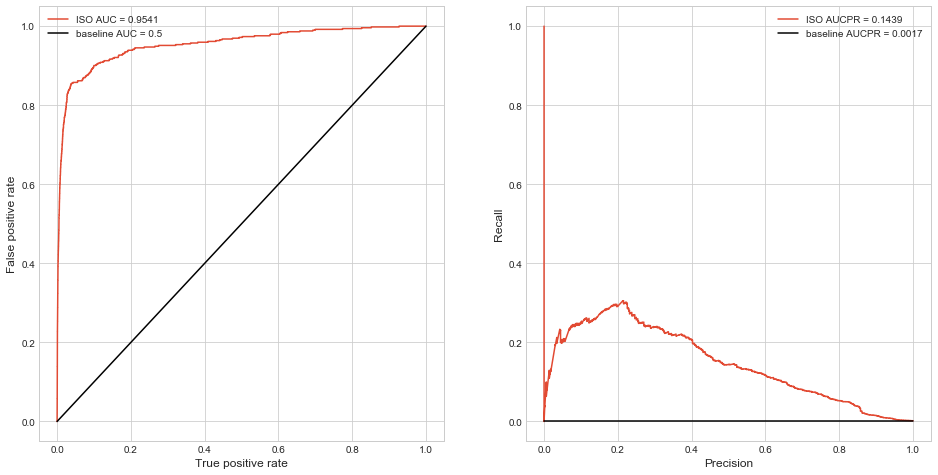

In [163]:
figure()
axes = prediction_summary(
    iso_predictions["class"], iso_predictions["predict"], "ISO")

# Conclusion:

Fraud detection is one of the most interesting and complex Machine Learning problems. Typically it involves extreme class imbalance which needs to be handled by techniques such as SMOTE. Also, credit card fraud is an ever-evolving beast like Hydra! If you cut one head, 2 other heads will grow back in its place! This means supervised learning framework does not work well becuase the model performance deteriorates very quickly. Unsupervised anamoly detection algorithms such as Isolation Forest show a great potential to develop more robust fraud detection systems.